In [22]:
# import librares
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import timeit
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,MinMaxScaler,RobustScaler
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.model_selection import cross_validate ,GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from category_encoders import BinaryEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from imblearn.under_sampling import RandomUnderSampler
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import OrdinalEncoder, RobustScaler
from frequency_encoder import FrequencyEncoder
from lightgbm import LGBMRegressor
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import Ridge
from sklearn.preprocessing import LabelEncoder

import joblib
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module="sklearn")
warnings.filterwarnings("ignore", message="X does not have valid feature names.*")


The data has been fully collected ✅. 
Shape: (558837, 16)


🚩First 10 rows : 



,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,41.0,14282.0,white,black,volvo na rep/world omni,27500.0,27750.0,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,43.0,2641.0,gray,black,financial services remarketing (lease),66000.0,67000.0,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)
5,2015,Nissan,Altima,2.5 S,Sedan,automatic,1n4al3ap1fn326013,ca,1.0,5554.0,gray,black,enterprise vehicle exchange / tra / rental / t...,15350.0,10900.0,Tue Dec 30 2014 12:00:00 GMT-0800 (PST)
6,2014,BMW,M5,Base,Sedan,automatic,wbsfv9c51ed593089,ca,34.0,14943.0,black,black,the hertz corporation,69000.0,65000.0,Wed Dec 17 2014 12:30:00 GMT-0800 (PST)
7,2014,Chevrolet,Cruze,1LT,Sedan,automatic,1g1pc5sb2e7128460,ca,2.0,28617.0,black,black,enterprise vehicle exchange / tra / rental / t...,11900.0,9800.0,Tue Dec 16 2014 13:00:00 GMT-0800 (PST)
8,2014,Audi,A4,2.0T Premium Plus quattro,Sedan,automatic,wauffafl3en030343,ca,42.0,9557.0,white,black,audi mission viejo,32100.0,32250.0,Thu Dec 18 2014 12:00:00 GMT-0800 (PST)
9,2014,Chevrolet,Camaro,LT,Convertible,automatic,2g1fb3d37e9218789,ca,3.0,4809.0,red,black,d/m auto sales inc,26300.0,17500.0,Tue Jan 20 2015 04:00:00 GMT-0800 (PST)



🚩last 10 rows : 



,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
558827,2014,Jeep,Grand Cherokee,Laredo,SUV,automatic,1c4rjfag0ec466276,pa,42.0,25180.0,gray,black,hertz corporation/gdp,26000.0,24500.0,Tue Jul 07 2015 06:30:00 GMT-0700 (PDT)
558828,2012,Dodge,Grand Caravan,American Value Package,Minivan,automatic,2c4rdgbg1cr349287,ma,37.0,97036.0,silver,gray,ge fleet services for itself/servicer,8300.0,7800.0,Tue Jul 07 2015 06:30:00 GMT-0700 (PDT)
558829,2012,Hyundai,Elantra,Limited,Sedan,NaN,5npdh4ae7ch106397,pa,4.0,66720.0,gray,gray,champion mazda,10250.0,10400.0,Wed Jul 08 2015 07:30:00 GMT-0700 (PDT)
558830,2012,Nissan,Sentra,2.0 SR,Sedan,NaN,3n1ab6ap3cl622485,tn,26.0,35858.0,white,gray,nissan-infiniti lt,9950.0,10400.0,Wed Jul 08 2015 17:15:00 GMT-0700 (PDT)
558831,2011,BMW,5 Series,528i,Sedan,automatic,wbafr1c53bc744672,fl,39.0,66403.0,white,brown,lauderdale imports ltd bmw pembrok pines,20300.0,22800.0,Tue Jul 07 2015 06:15:00 GMT-0700 (PDT)
558832,2015,Kia,K900,Luxury,Sedan,NaN,knalw4d4xf6019304,in,45.0,18255.0,silver,black,avis corporation,35300.0,33000.0,Thu Jul 09 2015 07:00:00 GMT-0700 (PDT)
558833,2012,Ram,2500,Power Wagon,Crew Cab,automatic,3c6td5et6cg112407,wa,5.0,54393.0,white,black,i -5 uhlmann rv,30200.0,30800.0,Wed Jul 08 2015 09:30:00 GMT-0700 (PDT)
558834,2012,BMW,X5,xDrive35d,SUV,automatic,5uxzw0c58cl668465,ca,48.0,50561.0,black,black,financial services remarketing (lease),29800.0,34000.0,Wed Jul 08 2015 09:30:00 GMT-0700 (PDT)
558835,2015,Nissan,Altima,2.5 S,sedan,automatic,1n4al3ap0fc216050,ga,38.0,16658.0,white,black,enterprise vehicle exchange / tra / rental / t...,15100.0,11100.0,Thu Jul 09 2015 06:45:00 GMT-0700 (PDT)
558836,2014,Ford,F-150,XLT,SuperCrew,automatic,1ftfw1et2eke87277,ca,34.0,15008.0,gray,gray,ford motor credit company llc pd,29600.0,26700.0,Thu May 28 2015 05:30:00 GMT-0700 (PDT)



📌Data fram info : 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558837 entries, 0 to 558836
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          558837 non-null  int64  
 1   make          548536 non-null  object 
 2   model         548438 non-null  object 
 3   trim          548186 non-null  object 
 4   body          545642 non-null  object 
 5   transmission  493485 non-null  object 
 6   vin           558833 non-null  object 
 7   state         558837 non-null  object 
 8   condition     547017 non-null  float64
 9   odometer      558743 non-null  float64
 10  color         558088 non-null  object 
 11  interior      558088 non-null  object 
 12  seller        558837 non-null  object 
 13  mmr           558799 non-null  float64
 14  sellingprice  558825 non-null  float64
 15  saledate      558825 non-null  object 
dtypes: float64(4), int64(1), object(11)
memory usage: 68.2+ MB


None



📌Describe of numerical columns : 



,count,mean,std,min,25%,50%,75%,max
year,558837.0,2010.038927,3.966864,1982.0,2007.0,2012.0,2013.0,2015.0
condition,547017.0,30.672365,13.402832,1.0,23.0,35.0,42.0,49.0
odometer,558743.0,68320.017767,53398.542821,1.0,28371.0,52254.0,99109.0,999999.0
mmr,558799.0,13769.377495,9679.967174,25.0,7100.0,12250.0,18300.0,182000.0
sellingprice,558825.0,13611.358810,9749.501628,1.0,6900.0,12100.0,18200.0,230000.0




📌Describe of catgorical columns : 



,count,unique,top,freq
make,548536,96,Ford,93554
model,548438,973,Altima,19349
trim,548186,1963,Base,55817
body,545642,87,Sedan,199437
transmission,493485,4,automatic,475915
vin,558833,550297,automatic,22
state,558837,64,fl,82945
color,558088,46,black,110970
interior,558088,17,black,244329
seller,558837,14263,nissan-infiniti lt,19693




📌Check the unique values in catgorical columns : 

column : make
make
Ford             93554
Chevrolet        60197
Nissan           53946
Toyota           39871
Dodge            30710
Honda            27206
Hyundai          21816
BMW              20719
Kia              18077
Chrysler         17276
Mercedes-Benz    17141
Jeep             15372
Infiniti         15305
Volkswagen       12581
Lexus            11861
GMC              10613
Mazda             8362
Cadillac          7519
Acura             5901
Audi              5869
Lincoln           5757
Buick             5107
Subaru            5043
Ram               4574
Pontiac           4497
Mitsubishi        4140
Volvo             3788
MINI              3224
Saturn            2841
Mercury           1992
Name: count, dtype: int64

count of values :97

column : model
model
Altima              19349
F-150               14479
Fusion              12946
Camry               12545
Escape              11861
Focus               10394
Accord       

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
408161,2015,Volkswagen,Jetta,SE PZEV w/Connectivity,Navitgation,Sedan,automatic,3vwd17aj4fm201708,NaN,46.0,4802,silver,gray,NaN,13200.0,16500
417835,2015,Volkswagen,Jetta,SE PZEV w/Connectivity,Navitgation,Sedan,automatic,3vwd17aj2fm258506,NaN,1.0,9410,white,gray,NaN,13300.0,10500
421289,2015,Volkswagen,Jetta,SE PZEV w/Connectivity,Navitgation,Sedan,automatic,3vwd17aj3fm276741,NaN,46.0,1167,blue,black,NaN,13200.0,12700
424161,2015,Volkswagen,Jetta,SE PZEV w/Connectivity,Navitgation,Sedan,automatic,3vwd17aj2fm285365,NaN,1.0,2172,gray,black,NaN,14050.0,8250
427040,2015,Volkswagen,Jetta,SE PZEV w/Connectivity,Navitgation,Sedan,automatic,3vwd17aj0fm227318,NaN,41.0,14872,gray,black,NaN,13700.0,14300
427043,2015,Volkswagen,Jetta,SE PZEV w/Connectivity,Navitgation,Sedan,automatic,3vwd17aj6fm218641,NaN,49.0,12655,red,black,NaN,13850.0,14500
434424,2015,Volkswagen,Jetta,SE PZEV w/Connectivity,Navitgation,Sedan,automatic,3vwd17aj7fm223475,NaN,46.0,15719,blue,black,NaN,13650.0,13500
444501,2015,Volkswagen,Jetta,SE PZEV w/Connectivity,Navitgation,Sedan,automatic,3vwd17aj5fm297123,NaN,2.0,6388,white,black,NaN,13850.0,10700
453794,2015,Volkswagen,Jetta,SE PZEV w/Connectivity,Navitgation,Sedan,automatic,3vwd17aj5fm219943,NaN,44.0,16633,silver,black,NaN,13600.0,13600
461597,2015,Volkswagen,Jetta,SE PZEV w/Connectivity,Navitgation,Sedan,automatic,3vwd17aj9fm219766,NaN,44.0,11034,black,black,NaN,13900.0,13000




All 26 rows cleand ✅


body column values cleand ✅


Handling Data type of saledate column


h:\Final project\data_clean_prep.py:206: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['saledate'] = pd.to_datetime(df['saledate'], errors='coerce', utc=True)



saledate column data type handling, Done ✅


New columns nameIndex(['model_year', 'brand', 'model', 'trim', 'body', 'transmission', 'vin',
       'state', 'condition', 'motor_mi', 'color', 'interior', 'seller', 'mmr',
       'sellingprice', 'saledate'],
      dtype='object')

Rename some columns, Done ✅


📌Clean brand cloumn Wrong Values!

Clean, Done✅


📌Clean body cloumn Wrong Values!

Clean, Done✅


📌Clean model cloumn Wrong Values!

Clean, Done✅


🔍 Null values ratio per column:


Column : model_year
Missing values count = 0
Missing % = 0.0

Column : brand
Missing values count = 10301
Missing % = 1.8432924090566658

Column : model
Missing values count = 0
Missing % = 0.0

Column : trim
Missing values count = 10651
Missing % = 1.9059224782897337

Column : body
Missing values count = 0
Missing % = 0.0

Column : transmission
Missing values count = 65356
Missing % = 11.695002299418256

Column : vin
Missing values count = 0
Missing % = 0.0

Column : state
Missing values count = 26
Miss

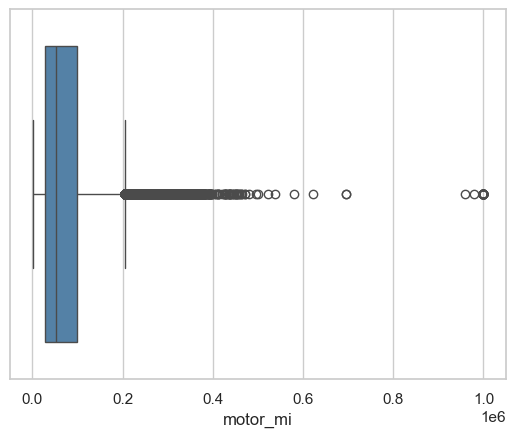

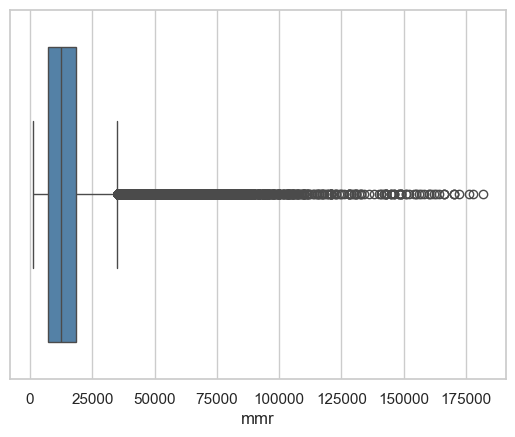

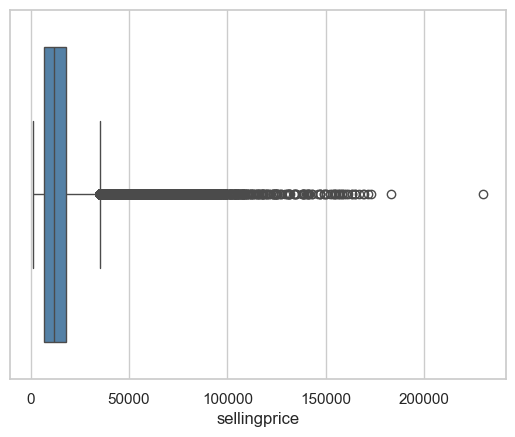




🔍 outlier values ratio per column:


Column: motor_mi
upper_bound = 205197.5
lower_bound = -77718.5
Number of outliers: 10382
percentage of outlier = 1.8578266899297633
--------------------
Column: mmr
upper_bound = 35100.0
lower_bound = -9700.0
Number of outliers: 16315
percentage of outlier = 2.919518632845703
--------------------
Column: sellingprice
upper_bound = 35150.0
lower_bound = -10050.0
Number of outliers: 16354
percentage of outlier = 2.9264975618485214
--------------------



⚠️I decided not to make any changes to these columns : mmr & sellingprice
because these are real values in the data and they exist. It would be wrong to remove or change them.
And i decided to handling some outliers at motor_mi column .
But threshold , which is 400,000 ⚠️


Handling Outlier values in motor_mi column, Done ✅!


Handling All Outlier values, Done ✅!


Append new market_advantage column, Done ✅!


Append new sell_year column, Done ✅!

Append new sell_month_name column, Done ✅!

Append 

In [2]:
from data_clean_prep import return_df

In [3]:
data = return_df()

In [4]:
data.shape

(558821, 24)

In [23]:
df = data.copy()

In [24]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558821 entries, 0 to 558820
Data columns (total 24 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   model_year        558821 non-null  int64         
 1   brand             558821 non-null  object        
 2   model             558821 non-null  object        
 3   trim              558821 non-null  object        
 4   body              558821 non-null  object        
 5   transmission      558821 non-null  object        
 6   state             558821 non-null  object        
 7   condition         558821 non-null  float64       
 8   motor_mi          558821 non-null  float64       
 9   color             558821 non-null  object        
 10  interior          558821 non-null  object        
 11  seller            558821 non-null  object        
 12  mmr               558821 non-null  float64       
 13  sellingprice      558821 non-null  float64       
 14  sale

In [25]:
df.drop(['seller','saledate','market_advantage','sell_month_name','sell_day_name','sell_hour','trim', 'season','sellingprice'],axis = 1 , inplace = True)

In [26]:
# Condition Values change from 0 to 50 --> 1 to 5 
df['condition'] = pd.cut(df['condition'], bins=[0, 10, 20, 30, 40, 50], labels=[1, 2, 3, 4, 5])
df['condition'] = df['condition'].astype(int)


In [27]:
df_holdout = df.head(100)

df = df.iloc[100:] 

In [28]:
df['motor_mi'] = np.log1p(df['motor_mi'])


In [16]:
BrandList=df['brand'].unique().tolist()
ModelList=df['model'].unique().tolist()
BodyList=df['body'].unique().tolist()
TransmissionList=df['transmission'].unique().tolist()
StateList=df['state'].unique().tolist()
ColorList=df['color'].unique().tolist()
InteriorList=df['interior'].unique().tolist()
TimeperiodList=df['time_period'].unique().tolist()


joblib.dump(BrandList,"H5/BrandList.h5")
joblib.dump(ModelList,"H5/ModelList.h5")
joblib.dump(BodyList,"H5/BodyList.h5")
joblib.dump(TransmissionList,"H5/TransmissionList.h5")
joblib.dump(StateList,"H5/StateList.h5")
joblib.dump(ColorList,"H5/ColorList.h5")
joblib.dump(InteriorList,"H5/InteriorList.h5")
joblib.dump(TimeperiodList,"H5/TimeperiodList.h5")
joblib.dump(df.columns,"H5/input.h5")

['H5/input.h5']

In [ ]:
# RandomForest Batch 1
x = df.drop('mmr', axis = 1)
y = df['mmr']

# Column division
freq_cols = ['brand', 'model', 'body', 'state', 'color', 'interior', 'time_period']
binary_cols = ['transmission']
numeric_cols = [ 'motor_mi', 'condition', 'model_year']  # أضف الأعمدة الرقمية حسب بياناتك


# ColumnTransformer 
preprocessor = ColumnTransformer(transformers=[
    ('freq_enc', Pipeline([
        ('freq', FrequencyEncoder()),
        ('scale', RobustScaler())
    ]), freq_cols),  # Append Frequency Encoder and Scale columns after encode
    ('binary_enc', BinaryEncoder(), binary_cols), # Append Binary Encoder 
    ('num_scaler', RobustScaler(), numeric_cols)  # Append Robust Scaler
], remainder='passthrough')




# Creat Our model Pipeline
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', RandomForestRegressor(random_state=42, n_jobs=-1)) # Append RandomForestRegressor Model
])

# Batch 1
param_grid_1 = {
    'model__n_estimators': [100],
    'model__max_depth': [10],
    'model__min_samples_leaf': [1, 5],
    'model__min_samples_split': [2]
}


#  GridSearchCV

grid_search = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid_1,
    cv=5,
    scoring='r2',
    n_jobs=-1,
    verbose=2,
    return_train_score=True
)

# Run Training + Timing

start = timeit.default_timer()

grid_search.fit(x, y)  

stop = timeit.default_timer()

# ✅ Results
print("=" * 50)
print("🔍 Best Parameters Found:")
print(grid_search.best_params_)
print("=" * 50)
print("🏆 Best Cross-Validated R2 Score:", grid_search.best_score_)
print("⏱️ Run Time:", stop - start, "seconds")
print("=" * 50)





#Fitting 5 folds for each of 2 candidates, totalling 10 fits
#==================================================
#🔍 Best Parameters Found:
#{'model__max_depth': 10, 'model__min_samples_leaf': 1, 'model__min_samples_split': 2, 'model__n_estimators': 100}
#==================================================
#🏆 Best Cross-Validated R2 Score: 0.756895460117908
#⏱️ Run Time: 89.61382149999554 seconds
#==================================================

Fitting 5 folds for each of 2 candidates, totalling 10 fits
🔍 Best Parameters Found:
{'model__max_depth': 10, 'model__min_samples_leaf': 1, 'model__min_samples_split': 2, 'model__n_estimators': 100}
🏆 Best Cross-Validated R2 Score: 0.756895460117908
⏱️ Run Time: 89.61382149999554 seconds


In [ ]:
# RandomForest Batch 2
x = df.drop('mmr', axis = 1)
y = df['mmr']

# Column division
freq_cols = ['brand', 'model', 'body', 'state', 'color', 'interior', 'time_period']
binary_cols = ['transmission']
numeric_cols = [ 'motor_mi', 'condition', 'model_year']  # أضف الأعمدة الرقمية حسب بياناتك


# ColumnTransformer 
preprocessor = ColumnTransformer(transformers=[
    ('freq_enc', Pipeline([
        ('freq', FrequencyEncoder()),
        ('scale', RobustScaler())
    ]), freq_cols),  # Append Frequency Encoder and Scale columns after encode
    ('binary_enc', BinaryEncoder(), binary_cols), # Append Binary Encoder 
    ('num_scaler', RobustScaler(), numeric_cols)  # Append Robust Scaler
], remainder='passthrough')




# Creat Our model Pipeline
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    
    ('model', RandomForestRegressor(random_state=42, n_jobs=-1)) # Append RandomForestRegressor Model
])

# Batch 3
param_grid_3 = {
    'model__n_estimators': [100],
    'model__max_depth': [None],
    'model__min_samples_leaf': [1],
    'model__min_samples_split': [5]
}



#  GridSearchCV

grid_search = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid_3,
    cv=5,
    scoring='r2',
    n_jobs=-1,
    verbose=2,
    return_train_score=True
)

# Run Training + Timing

start = timeit.default_timer()

grid_search.fit(x, y)  

stop = timeit.default_timer()

# ✅ Results
print("=" * 50)
print("🔍 Best Parameters Found:")
print(grid_search.best_params_)
print("=" * 50)
print("🏆 Best Cross-Validated R2 Score:", grid_search.best_score_)
print("⏱️ Run Time:", stop - start, "seconds")
print("=" * 50)





'''Fitting 5 folds for each of 1 candidates, totalling 5 fits
==================================================
🔍 Best Parameters Found:
{'model__max_depth': None, 'model__min_samples_leaf': 1, 'model__min_samples_split': 5, 'model__n_estimators': 100}
==================================================
🏆 Best Cross-Validated R2 Score: 0.8743258765094108
⏱️ Run Time: 92.61689260000276 seconds
=================================================='''

Fitting 5 folds for each of 1 candidates, totalling 5 fits
🔍 Best Parameters Found:
{'model__max_depth': None, 'model__min_samples_leaf': 1, 'model__min_samples_split': 5, 'model__n_estimators': 100}
🏆 Best Cross-Validated R2 Score: 0.8743258765094108
⏱️ Run Time: 92.61689260000276 seconds


In [ ]:
# RandomForest Batch 3
x = df.drop('mmr', axis = 1)
y = df['mmr']

# Column division
freq_cols = ['brand', 'model', 'body', 'state', 'color', 'interior', 'time_period']
binary_cols = ['transmission']
numeric_cols = [ 'motor_mi', 'condition', 'model_year']  # أضف الأعمدة الرقمية حسب بياناتك


# ColumnTransformer 
preprocessor = ColumnTransformer(transformers=[
    ('freq_enc', Pipeline([
        ('freq', FrequencyEncoder()),
        ('scale', RobustScaler())
    ]), freq_cols),  # Append Frequency Encoder and Scale columns after encode
    ('binary_enc', BinaryEncoder(), binary_cols), # Append Binary Encoder 
    ('num_scaler', RobustScaler(), numeric_cols)  # Append Robust Scaler
], remainder='passthrough')




# Creat Our model Pipeline
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('feature_select', SelectFromModel(XGBRegressor(n_estimators=100, random_state=42))),  # Feature Selection
    ('model', RandomForestRegressor(random_state=42, n_jobs=-1)) # Append RandomForestRegressor Model
])

# Batch 4
param_grid_4 = {
    'model__n_estimators': [200],
    'model__max_depth': [None],
    'model__min_samples_leaf': [10],
    'model__min_samples_split': [5]
}



#  GridSearchCV

grid_search = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid_4,
    cv=5,
    scoring='r2',
    n_jobs=-1,
    verbose=2,
    return_train_score=True
)

# Run Training + Timing

start = timeit.default_timer()

grid_search.fit(x, y)  

stop = timeit.default_timer()

# ✅ Results
print("=" * 50)
print("🔍 Best Parameters Found:")
print(grid_search.best_params_)
print("=" * 50)
print("🏆 Best Cross-Validated R2 Score:", grid_search.best_score_)
print("⏱️ Run Time:", stop - start, "seconds")
print("=" * 50)



'''Fitting 5 folds for each of 1 candidates, totalling 5 fits
==================================================
🔍 Best Parameters Found:
{'model__max_depth': None, 'model__min_samples_leaf': 10, 'model__min_samples_split': 5, 'model__n_estimators': 200}
==================================================
🏆 Best Cross-Validated R2 Score: 0.8628501079079187
⏱️ Run Time: 80.8760661999986 seconds
=================================================='''

Fitting 5 folds for each of 1 candidates, totalling 5 fits
🔍 Best Parameters Found:
{'model__max_depth': None, 'model__min_samples_leaf': 10, 'model__min_samples_split': 5, 'model__n_estimators': 200}
🏆 Best Cross-Validated R2 Score: 0.8628501079079187
⏱️ Run Time: 80.8760661999986 seconds


In [ ]:
# XGBRegressor Batch 1
x = df.drop('mmr', axis = 1)
y = df['mmr']

# Column division
freq_cols = ['brand', 'model', 'body', 'state', 'color', 'interior', 'time_period']
binary_cols = ['transmission']
numeric_cols = [ 'motor_mi', 'condition', 'model_year']  


# ColumnTransformer 
preprocessor = ColumnTransformer(transformers=[
    ('freq_enc', Pipeline([
        ('freq', FrequencyEncoder()),
        ('scale', RobustScaler())
    ]), freq_cols),  # Append Frequency Encoder and Scale columns after encode
    ('binary_enc', BinaryEncoder(), binary_cols), # Append Binary Encoder 
    ('num_scaler', RobustScaler(), numeric_cols)  # Append Robust Scaler
], remainder='passthrough')



# Creat Our model Pipeline
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', XGBRegressor(objective='reg:squarederror', random_state=42, n_jobs=-1, verbosity=0)) # Append XGBRegressor
])

 
param_grid_1 = {
    'model__n_estimators': [100],
    'model__max_depth': [3, 6],
    'model__learning_rate': [0.01, 0.1],
    'model__subsample': [0.8]
}


#  GridSearchCV
grid_search = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid_1,
    cv=5,
    scoring='r2',
    n_jobs=-1,
    verbose=2,
    return_train_score=True
)

# Run Training + Timing
start = timeit.default_timer()

grid_search.fit(x, y)  

stop = timeit.default_timer()


# ✅ Results
print("=" * 50)
print("🔍 Best Parameters Found:")
print(grid_search.best_params_)
print("=" * 50)
print("🏆 Best Cross-Validated R2 Score:", grid_search.best_score_)
print("⏱️ Run Time:", stop - start, "seconds")
print("=" * 50)


'''Fitting 5 folds for each of 4 candidates, totalling 20 fits
==================================================
🔍 Best Parameters Found:
{'model__learning_rate': 0.1, 'model__max_depth': 6, 'model__n_estimators': 100, 'model__subsample': 0.8}
==================================================
🏆 Best Cross-Validated R2 Score: 0.853963316738197
⏱️ Run Time: 24.61560129999998 seconds
=================================================='''

Fitting 5 folds for each of 4 candidates, totalling 20 fits
🔍 Best Parameters Found:
{'model__learning_rate': 0.1, 'model__max_depth': 6, 'model__n_estimators': 100, 'model__subsample': 0.8}
🏆 Best Cross-Validated R2 Score: 0.853963316738197
⏱️ Run Time: 24.61560129999998 seconds


"Fitting 5 folds for each of 4 candidates, totalling 20 fits\n==================================================\n🔍 Best Parameters Found:\n{'model__learning_rate': 0.1, 'model__max_depth': 6, 'model__n_estimators': 100, 'model__subsample': 0.8}\n==================================================\n🏆 Best Cross-Validated R2 Score: 0.8400356195030172\n⏱️ Run Time: 23.961899699999776 seconds\n=================================================="

In [ ]:
# XGBRegressor Batch 2
x = df.drop('mmr', axis = 1)
y = df['mmr']
# Column division
freq_cols = ['brand', 'model', 'body', 'state', 'color', 'interior', 'time_period']
binary_cols = ['transmission']
numeric_cols = [ 'motor_mi', 'condition', 'model_year']  


# ColumnTransformer 
preprocessor = ColumnTransformer(transformers=[
    ('freq_enc', Pipeline([
        ('freq', FrequencyEncoder()),
        ('scale', RobustScaler())
    ]), freq_cols),  # Append Frequency Encoder and Scale columns after encode
    ('binary_enc', BinaryEncoder(), binary_cols), # Append Binary Encoder 
    ('num_scaler', RobustScaler(), numeric_cols)  # Append Robust Scaler
], remainder='passthrough')



# Creat Our model Pipeline
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', XGBRegressor(objective='reg:squarederror', random_state=42, n_jobs=-1, verbosity=0)) # Append XGBRegressor
])

 
param_grid_2 = {
    'model__n_estimators': [100],
    'model__max_depth': [10],
    'model__learning_rate': [0.2],
    'model__subsample': [1.0]
}



#  GridSearchCV
grid_search = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid_2,
    cv=5,
    scoring='r2',
    n_jobs=-1,
    verbose=2,
    return_train_score=True
)

# Run Training + Timing
start = timeit.default_timer()

grid_search.fit(x, y)  

stop = timeit.default_timer()


# ✅ Results
print("=" * 50)
print("🔍 Best Parameters Found:")
print(grid_search.best_params_)
print("=" * 50)
print("🏆 Best Cross-Validated R2 Score:", grid_search.best_score_)
print("⏱️ Run Time:", stop - start, "seconds")
print("=" * 50)



'''Fitting 5 folds for each of 1 candidates, totalling 5 fits
==================================================
🔍 Best Parameters Found:
{'model__learning_rate': 0.2, 'model__max_depth': 10, 'model__n_estimators': 100, 'model__subsample': 1.0}
==================================================
🏆 Best Cross-Validated R2 Score: 0.8915944544741983
⏱️ Run Time: 12.183714999991935 seconds
=================================================='''

Fitting 5 folds for each of 1 candidates, totalling 5 fits
🔍 Best Parameters Found:
{'model__learning_rate': 0.2, 'model__max_depth': 10, 'model__n_estimators': 100, 'model__subsample': 1.0}
🏆 Best Cross-Validated R2 Score: 0.8915944544741983
⏱️ Run Time: 12.183714999991935 seconds


"Fitting 5 folds for each of 1 candidates, totalling 5 fits\n==================================================\n🔍 Best Parameters Found:\n{'model__learning_rate': 0.2, 'model__max_depth': 10, 'model__n_estimators': 100, 'model__subsample': 1.0}\n==================================================\n🏆 Best Cross-Validated R2 Score: 0.8867939723663507\n⏱️ Run Time: 13.002359699996305 seconds\n=================================================="

In [ ]:
# XGBRegressor Batch 3
x = df.drop('mmr', axis = 1)
y = df['mmr']

# Column division
freq_cols = ['brand', 'model', 'body', 'state', 'color', 'interior', 'time_period']
binary_cols = ['transmission']
numeric_cols = [ 'motor_mi', 'condition', 'model_year']  


# ColumnTransformer 
preprocessor = ColumnTransformer(transformers=[
    ('freq_enc', Pipeline([
        ('freq', FrequencyEncoder()),
        ('scale', RobustScaler())
    ]), freq_cols),  # Append Frequency Encoder and Scale columns after encode
    ('binary_enc', BinaryEncoder(), binary_cols), # Append Binary Encoder 
    ('num_scaler', RobustScaler(), numeric_cols)  # Append Robust Scaler
], remainder='passthrough')



# Creat Our model Pipeline
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', XGBRegressor(objective='reg:squarederror', random_state=42, n_jobs=-1, verbosity=0)) # Append XGBRegressor
])

 
param_grid_3 = {
    'model__n_estimators': [200],
    'model__max_depth': [3, 6],
    'model__learning_rate': [0.01],
    'model__subsample': [1.0]
}


#  GridSearchCV
grid_search = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid_3,
    cv=5,
    scoring='r2',
    n_jobs=-1,
    verbose=2,
    return_train_score=True
)

# Run Training + Timing
start = timeit.default_timer()

grid_search.fit(x, y)  

stop = timeit.default_timer()


# ✅ Results
print("=" * 50)
print("🔍 Best Parameters Found:")
print(grid_search.best_params_)
print("=" * 50)
print("🏆 Best Cross-Validated R2 Score:", grid_search.best_score_)
print("⏱️ Run Time:", stop - start, "seconds")
print("=" * 50)

'''Fitting 5 folds for each of 2 candidates, totalling 10 fits
==================================================
🔍 Best Parameters Found:
{'model__learning_rate': 0.01, 'model__max_depth': 6, 'model__n_estimators': 200, 'model__subsample': 1.0}
==================================================
🏆 Best Cross-Validated R2 Score: 0.7154654750890319
⏱️ Run Time: 28.720065599991358 seconds
=================================================='''


Fitting 5 folds for each of 2 candidates, totalling 10 fits
🔍 Best Parameters Found:
{'model__learning_rate': 0.01, 'model__max_depth': 6, 'model__n_estimators': 200, 'model__subsample': 1.0}
🏆 Best Cross-Validated R2 Score: 0.7154654750890319
⏱️ Run Time: 28.720065599991358 seconds


In [ ]:
# XGBRegressor Batch 4
x = df.drop('mmr', axis = 1)
y = df['mmr']

# Column division
freq_cols = ['brand', 'model', 'body', 'state', 'color', 'interior', 'time_period']
binary_cols = ['transmission']
numeric_cols = [ 'motor_mi', 'condition', 'model_year']  


# ColumnTransformer 
preprocessor = ColumnTransformer(transformers=[
    ('freq_enc', Pipeline([
        ('freq', FrequencyEncoder()),
        ('scale', RobustScaler())
    ]), freq_cols),  # Append Frequency Encoder and Scale columns after encode
    ('binary_enc', BinaryEncoder(), binary_cols), # Append Binary Encoder 
    ('num_scaler', RobustScaler(), numeric_cols)  # Append Robust Scaler
], remainder='passthrough')



# Creat Our model Pipeline
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', XGBRegressor(objective='reg:squarederror', random_state=42, n_jobs=-1, verbosity=0)) # Append XGBRegressor
])

 
param_grid_4 = {
    'model__n_estimators': [200],
    'model__max_depth': [10],
    'model__learning_rate': [0.1, 0.2],
    'model__subsample': [0.8]
}



#  GridSearchCV
grid_search = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid_4,
    cv=5,
    scoring='r2',
    n_jobs=-1,
    verbose=2,
    return_train_score=True
)

# Run Training + Timing
start = timeit.default_timer()

grid_search.fit(x, y)  

stop = timeit.default_timer()


# ✅ Results
print("=" * 50)
print("🔍 Best Parameters Found:")
print(grid_search.best_params_)
print("=" * 50)
print("🏆 Best Cross-Validated R2 Score:", grid_search.best_score_)
print("⏱️ Run Time:", stop - start, "seconds")
print("=" * 50)

'''Fitting 5 folds for each of 2 candidates, totalling 10 fits
==================================================
🔍 Best Parameters Found:
{'model__learning_rate': 0.1, 'model__max_depth': 10, 'model__n_estimators': 200, 'model__subsample': 0.8}
==================================================
🏆 Best Cross-Validated R2 Score: 0.894198518346986
⏱️ Run Time: 38.84120760000951 seconds
=================================================='''

Fitting 5 folds for each of 2 candidates, totalling 10 fits
🔍 Best Parameters Found:
{'model__learning_rate': 0.1, 'model__max_depth': 10, 'model__n_estimators': 200, 'model__subsample': 0.8}
🏆 Best Cross-Validated R2 Score: 0.894198518346986
⏱️ Run Time: 38.84120760000951 seconds


"Fitting 5 folds for each of 2 candidates, totalling 10 fits\n==================================================\n🔍 Best Parameters Found:\n{'model__learning_rate': 0.1, 'model__max_depth': 10, 'model__n_estimators': 200, 'model__subsample': 0.8}\n==================================================\n🏆 Best Cross-Validated R2 Score: 0.8894477853722857\n⏱️ Run Time: 33.51938869999867 seconds\n=================================================="

In [ ]:
# LGBMRegressor Batch 1
x = df.drop('mmr', axis = 1)
y = df['mmr']

# Column division
freq_cols = ['brand', 'model', 'body', 'state', 'color', 'interior', 'time_period']
binary_cols = ['transmission']
numeric_cols = [ 'motor_mi', 'condition', 'model_year']  


# ColumnTransformer 
preprocessor = ColumnTransformer(transformers=[
    ('freq_enc', Pipeline([
        ('freq', FrequencyEncoder()),
        ('scale', RobustScaler())
    ]), freq_cols),  # Append Frequency Encoder and Scale columns after encode
    ('binary_enc', BinaryEncoder(), binary_cols), # Append Binary Encoder 
    ('num_scaler', RobustScaler(), numeric_cols)  # Append Robust Scaler
], remainder='passthrough')



pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', LGBMRegressor(random_state=42, n_jobs=-1)) # Append LGBMRegressor
])



param_grid_1 = {
    'model__n_estimators': [100, 200],
    'model__max_depth': [6],
    'model__learning_rate': [0.01, 0.1, 0.2],
    'model__subsample': [0.8, 1.0],
    'model__colsample_bytree': [0.8, 1.0]
}



#  GridSearchCV
grid_search = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid_1,
    cv=5,
    scoring='r2',
    n_jobs=-1,
    verbose=2,
    return_train_score=True
)

# Run Training + Timing
start = timeit.default_timer()

grid_search.fit(x, y)  

stop = timeit.default_timer()


# ✅ Results
print("=" * 50)
print("🔍 Best Parameters Found:")
print(grid_search.best_params_)
print("=" * 50)
print("🏆 Best Cross-Validated R2 Score:", grid_search.best_score_)
print("⏱️ Run Time:", stop - start, "seconds")
print("=" * 50)


'''
Fitting 5 folds for each of 24 candidates, totalling 120 fits
==================================================
🔍 Best Parameters Found:
{'model__colsample_bytree': 1.0, 'model__learning_rate': 0.2, 'model__max_depth': 6, 'model__n_estimators': 200, 'model__subsample': 0.8}
==================================================
🏆 Best Cross-Validated R2 Score: 0.8760293202216202
⏱️ Run Time: 163.8350347999949 seconds
=================================================='''

Fitting 5 folds for each of 24 candidates, totalling 120 fits
🔍 Best Parameters Found:
{'model__colsample_bytree': 1.0, 'model__learning_rate': 0.2, 'model__max_depth': 6, 'model__n_estimators': 200, 'model__subsample': 0.8}
🏆 Best Cross-Validated R2 Score: 0.8760293202216202
⏱️ Run Time: 163.8350347999949 seconds


"\n🔍 Best Parameters Found:\n{'model__colsample_bytree': 1.0, 'model__learning_rate': 0.2, 'model__max_depth': 6, 'model__n_estimators': 200, 'model__subsample': 0.8}\n==================================================\n🏆 Best Cross-Validated R2 Score: 0.8679818596677971\n⏱️ Run Time: 194.73775559999922 seconds\n=================================================="

In [ ]:
# LGBMRegressor Batch 2
x = df.drop('mmr', axis = 1)
y = df['mmr']

# Column division
freq_cols = ['brand', 'model', 'body', 'state', 'color', 'interior', 'time_period']
binary_cols = ['transmission']
numeric_cols = [ 'motor_mi', 'condition', 'model_year']  


# ColumnTransformer 
preprocessor = ColumnTransformer(transformers=[
    ('freq_enc', Pipeline([
        ('freq', FrequencyEncoder()),
        ('scale', RobustScaler())
    ]), freq_cols),  # Append Frequency Encoder and Scale columns after encode
    ('binary_enc', BinaryEncoder(), binary_cols), # Append Binary Encoder 
    ('num_scaler', RobustScaler(), numeric_cols)  # Append Robust Scaler
], remainder='passthrough')



pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', LGBMRegressor(random_state=42, n_jobs=-1)) # Append LGBMRegressor
])



param_grid_2 = {
    'model__n_estimators': [100, 200],
    'model__max_depth': [10],
    'model__learning_rate': [0.01, 0.1, 0.2],
    'model__subsample': [0.8, 1.0],
    'model__colsample_bytree': [0.8, 1.0]
}




#  GridSearchCV
grid_search = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid_2,
    cv=5,
    scoring='r2',
    n_jobs=-1,
    verbose=2,
    return_train_score=True
)

# Run Training + Timing
start = timeit.default_timer()

grid_search.fit(x, y)  

stop = timeit.default_timer()


# ✅ Results
print("=" * 50)
print("🔍 Best Parameters Found:")
print(grid_search.best_params_)
print("=" * 50)
print("🏆 Best Cross-Validated R2 Score:", grid_search.best_score_)
print("⏱️ Run Time:", stop - start, "seconds")
print("=" * 50)


'''
Fitting 5 folds for each of 24 candidates, totalling 120 fits
==================================================
🔍 Best Parameters Found:
{'model__colsample_bytree': 1.0, 'model__learning_rate': 0.2, 'model__max_depth': 10, 'model__n_estimators': 200, 'model__subsample': 0.8}
==================================================
🏆 Best Cross-Validated R2 Score: 0.8821500645755588
⏱️ Run Time: 169.01407190000464 seconds
=================================================='''

Fitting 5 folds for each of 24 candidates, totalling 120 fits
🔍 Best Parameters Found:
{'model__colsample_bytree': 1.0, 'model__learning_rate': 0.2, 'model__max_depth': 10, 'model__n_estimators': 200, 'model__subsample': 0.8}
🏆 Best Cross-Validated R2 Score: 0.8821500645755588
⏱️ Run Time: 169.01407190000464 seconds


"\n🔍 Best Parameters Found:\n{'model__colsample_bytree': 0.8, 'model__learning_rate': 0.2, 'model__max_depth': 10, 'model__n_estimators': 200, 'model__subsample': 0.8}\n==================================================\n🏆 Best Cross-Validated R2 Score: 0.8768966224579898\n⏱️ Run Time: 159.4608836999978 seconds\n=================================================="

In [ ]:
# LGBMRegressor Batch 3
x = df.drop('mmr', axis = 1)
y = df['mmr']

# Column division
freq_cols = ['brand', 'model', 'body', 'state', 'color', 'interior', 'time_period']
binary_cols = ['transmission']
numeric_cols = [ 'motor_mi', 'condition', 'model_year']  


# ColumnTransformer 
preprocessor = ColumnTransformer(transformers=[
    ('freq_enc', Pipeline([
        ('freq', FrequencyEncoder()),
        ('scale', RobustScaler())
    ]), freq_cols),  # Append Frequency Encoder and Scale columns after encode
    ('binary_enc', BinaryEncoder(), binary_cols), # Append Binary Encoder 
    ('num_scaler', RobustScaler(), numeric_cols)  # Append Robust Scaler
], remainder='passthrough')



pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', LGBMRegressor(random_state=42, n_jobs=-1)) # Append LGBMRegressor
])



param_grid_3 = {
    'model__n_estimators': [100, 200],
    'model__max_depth': [-1],
    'model__learning_rate': [0.01],
    'model__subsample': [0.8, 1.0],
    'model__colsample_bytree': [0.8, 1.0]
}



#  GridSearchCV
grid_search = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid_3,
    cv=5,
    scoring='r2',
    n_jobs=-1,
    verbose=2,
    return_train_score=True
)

# Run Training + Timing
start = timeit.default_timer()

grid_search.fit(x, y)  

stop = timeit.default_timer()


# ✅ Results
print("=" * 50)
print("🔍 Best Parameters Found:")
print(grid_search.best_params_)
print("=" * 50)
print("🏆 Best Cross-Validated R2 Score:", grid_search.best_score_)
print("⏱️ Run Time:", stop - start, "seconds")
print("=" * 50)


'''
Fitting 5 folds for each of 8 candidates, totalling 40 fits
==================================================
🔍 Best Parameters Found:
{'model__colsample_bytree': 0.8, 'model__learning_rate': 0.01, 'model__max_depth': -1, 'model__n_estimators': 200, 'model__subsample': 0.8}
==================================================
🏆 Best Cross-Validated R2 Score: 0.7285297368647413
⏱️ Run Time: 54.4095682999905 seconds
=================================================='''

Fitting 5 folds for each of 8 candidates, totalling 40 fits
🔍 Best Parameters Found:
{'model__colsample_bytree': 0.8, 'model__learning_rate': 0.01, 'model__max_depth': -1, 'model__n_estimators': 200, 'model__subsample': 0.8}
🏆 Best Cross-Validated R2 Score: 0.7285297368647413
⏱️ Run Time: 54.4095682999905 seconds


"\n🔍 Best Parameters Found:\n{'model__colsample_bytree': 0.8, 'model__learning_rate': 0.01, 'model__max_depth': -1, 'model__n_estimators': 200, 'model__subsample': 0.8}\n==================================================\n🏆 Best Cross-Validated R2 Score: 0.6957886001270271\n⏱️ Run Time: 68.8599078000043 seconds\n=================================================="

In [ ]:
# LGBMRegressor Batch 4
x = df.drop('mmr', axis = 1)
y = df['mmr']
# Column division
freq_cols = ['brand', 'model', 'body', 'state', 'color', 'interior', 'time_period']
binary_cols = ['transmission']
numeric_cols = [ 'motor_mi', 'condition', 'model_year']  


# ColumnTransformer 
preprocessor = ColumnTransformer(transformers=[
    ('freq_enc', Pipeline([
        ('freq', FrequencyEncoder()),
        ('scale', RobustScaler())
    ]), freq_cols),  # Append Frequency Encoder and Scale columns after encode
    ('binary_enc', BinaryEncoder(), binary_cols), # Append Binary Encoder 
    ('num_scaler', RobustScaler(), numeric_cols)  # Append Robust Scaler
], remainder='passthrough')



pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', LGBMRegressor(random_state=42, n_jobs=-1)) # Append LGBMRegressor
])



param_grid_4 = {
    'model__n_estimators': [100, 200],
    'model__max_depth': [-1],
    'model__learning_rate': [0.1, 0.2],
    'model__subsample': [0.8, 1.0],
    'model__colsample_bytree': [0.8, 1.0]
}



#  GridSearchCV
grid_search = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid_4,
    cv=5,
    scoring='r2',
    n_jobs=-1,
    verbose=2,
    return_train_score=True
)

# Run Training + Timing
start = timeit.default_timer()

grid_search.fit(x, y)  

stop = timeit.default_timer()


# ✅ Results
print("=" * 50)
print("🔍 Best Parameters Found:")
print(grid_search.best_params_)
print("=" * 50)
print("🏆 Best Cross-Validated R2 Score:", grid_search.best_score_)
print("⏱️ Run Time:", stop - start, "seconds")
print("=" * 50)



'''
Fitting 5 folds for each of 16 candidates, totalling 80 fits
==================================================
🔍 Best Parameters Found:
{'model__colsample_bytree': 1.0, 'model__learning_rate': 0.2, 'model__max_depth': -1, 'model__n_estimators': 200, 'model__subsample': 0.8}
==================================================
🏆 Best Cross-Validated R2 Score: 0.8825314064709993
⏱️ Run Time: 97.60112010000739 seconds
=================================================='''

Fitting 5 folds for each of 16 candidates, totalling 80 fits
🔍 Best Parameters Found:
{'model__colsample_bytree': 1.0, 'model__learning_rate': 0.2, 'model__max_depth': -1, 'model__n_estimators': 200, 'model__subsample': 0.8}
🏆 Best Cross-Validated R2 Score: 0.8825314064709993
⏱️ Run Time: 97.60112010000739 seconds


"\n🔍 Best Parameters Found:\n{'model__colsample_bytree': 1.0, 'model__learning_rate': 0.2, 'model__max_depth': -1, 'model__n_estimators': 200, 'model__subsample': 0.8}\n==================================================\n🏆 Best Cross-Validated R2 Score: 0.8789150817286059\n⏱️ Run Time: 102.13932220000424 seconds\n=================================================="

In [ ]:
# Random forest model With best Params
x = df.drop('mmr', axis = 1)
y = df['mmr']

# Column division
freq_cols = ['brand', 'model', 'body', 'state', 'color', 'interior', 'time_period']
binary_cols = ['transmission']
scale_cols = ['motor_mi', 'condition', 'model_year','sell_year', 'sell_month', 'sell_day']


# ColumnTransformer 
preprocessor = ColumnTransformer(transformers=[
    ('freq_enc', Pipeline([
        ('freq', FrequencyEncoder()),
        ('scale', RobustScaler())
    ]), freq_cols),  # Append Frequency Encoder and Scale columns after encode
    ('binary_enc', BinaryEncoder(), binary_cols), # Append Binary Encoder 
    ('num_scaler', RobustScaler(), scale_cols)  # Append Robust Scaler
], remainder='passthrough')




#Pipeline 
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', RandomForestRegressor(n_estimators=200,max_depth=None, random_state=42, n_jobs=-1, min_samples_leaf=5))
])
# Run Training + Timing
start = timeit.default_timer()



scores = cross_validate(pipeline, x,  np.log1p(y) , cv=5,
                        scoring=['r2', 'neg_mean_squared_error', 'neg_mean_absolute_error'],
                        return_train_score=True)


stop = timeit.default_timer()

# ✅ Results
print("-" * 25)
print("Train R2:", scores['train_r2'].mean())
print("Test R2:", scores['test_r2'].mean())
print("-" * 25)
print("Train MSE:", abs(scores['train_neg_mean_squared_error'].mean()))
print("Test MSE:", abs(scores['test_neg_mean_squared_error'].mean()))
print("-" * 25)
print("Train MAE:", abs(scores['train_neg_mean_absolute_error'].mean()))
print("Test MAE:", abs(scores['test_neg_mean_absolute_error'].mean()))
print("=" * 50)
print("Run Time:", stop - start) 


'''-------------------------
Train R2: 0.946261449433184
Test R2: 0.8910634209001526
-------------------------
Train MSE: 0.04546880742062746
Test MSE: 0.09194411400513426
-------------------------
Train MAE: 0.13215704487576957
Test MAE: 0.19213873893963546
==================================================
Run Time: 129.21590199999991'''


-------------------------
Train R2: 0.946261449433184
Test R2: 0.8910634209001526
-------------------------
Train MSE: 0.04546880742062746
Test MSE: 0.09194411400513426
-------------------------
Train MAE: 0.13215704487576957
Test MAE: 0.19213873893963546
Run Time: 129.21590199999991


In [131]:
pipeline.fit(x,y)
joblib.dump(pipeline,'car_price_RF_ML_model.h5')

['car_price_RF_ML_model.h5']

In [ ]:
# XGBRegressor with Best params
x = df.drop('mmr', axis = 1)
y = df['mmr']

#  Column division
freq_cols = ['brand', 'model', 'body', 'state', 'color', 'interior', 'time_period']
binary_cols = ['transmission']
scale_cols = ['motor_mi', 'condition', 'model_year','sell_year', 'sell_month', 'sell_day']

#  ColumnTransformer
preprocessor = ColumnTransformer(transformers=[
    ('freq_enc', Pipeline([
        ('freq', FrequencyEncoder()),
        ('scale', StandardScaler())
    ]), freq_cols),
    ('binary_enc', BinaryEncoder(), binary_cols),
    ('num_scaler', StandardScaler(), scale_cols)
], remainder='passthrough')

#  XGB Pipeline 
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', XGBRegressor(
        n_estimators=200,
        max_depth=10,
        learning_rate=0.1,
        subsample=0.8,
        objective='reg:squarederror',
        random_state=42,
        n_jobs=-1,
        verbosity=0,
        reg_alpha=0.5,
        reg_lambda=1.0

    ))
])

#  Run Cross-Validation + Timing
start = timeit.default_timer()

scores = cross_validate(pipeline, x,  np.log1p(y), cv=5,
                        scoring=['r2', 'neg_mean_squared_error', 'neg_mean_absolute_error'],
                        return_train_score=True)

stop = timeit.default_timer()

# ✅ Results
print("-" * 25)
print("Train R2:", scores['train_r2'].mean())
print("Test R2:", scores['test_r2'].mean())
print("-" * 25)
print("Train MSE:", abs(scores['train_neg_mean_squared_error'].mean()))
print("Test MSE:", abs(scores['test_neg_mean_squared_error'].mean()))
print("-" * 25)
print("Train MAE:", abs(scores['train_neg_mean_absolute_error'].mean()))
print("Test MAE:", abs(scores['test_neg_mean_absolute_error'].mean()))
print("=" * 50)
print("Run Time:", stop - start)



'''-------------------------
Train R2: 0.960963762330304
Test R2: 0.9445738471384603
-------------------------
Train MSE: 0.027015349655754927
Test MSE: 0.03807319974785939
-------------------------
Train MAE: 0.10902289578598678
Test MAE: 0.12793355842019805
==================================================
Run Time: 12.992361999989953'''


-------------------------
Train R2: 0.960963762330304
Test R2: 0.9445738471384603
-------------------------
Train MSE: 0.027015349655754927
Test MSE: 0.03807319974785939
-------------------------
Train MAE: 0.10902289578598678
Test MAE: 0.12793355842019805
Run Time: 12.992361999989953


'-------------------------\nTrain R2: 0.9527493213803208\nTest R2: 0.9092405179293085\n-------------------------\nTrain MSE: 0.039991949206559164\nTest MSE: 0.07643960325649532\n-------------------------\nTrain MAE: 0.1321781213205226\nTest MAE: 0.173962238933765\n==================================================\nRun Time: 13.649118099994666'

In [134]:
pipeline.fit(x,y)
joblib.dump(pipeline,'car_price_xgb_ML_model.h5')

['car_price_xgb_ML_model.h5']

In [ ]:
# LightGBM with Best params
x = df.drop('mmr', axis = 1)
y = df['mmr']

#  Column division
freq_cols = ['brand', 'model', 'body', 'state', 'color', 'interior', 'time_period']
binary_cols = ['transmission']
scale_cols = ['motor_mi', 'condition', 'model_year','sell_year', 'sell_month', 'sell_day']

#  ColumnTransformer
preprocessor = ColumnTransformer(transformers=[
    ('freq_enc', Pipeline([
        ('freq', FrequencyEncoder()),
        ('scale', RobustScaler())
    ]), freq_cols),
    ('binary_enc', BinaryEncoder(), binary_cols),
    ('num_scaler', RobustScaler(), scale_cols)
], remainder='passthrough')

# ✅ LightGBM Pipeline 
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', LGBMRegressor(
        n_estimators=200,
        max_depth=-1,
        learning_rate=0.2,
        subsample=0.8,
        colsample_bytree=1.0,
        random_state=42,
        n_jobs=-1,
        verbose=-1,


    ))
])

#  Run Cross-Validation + Timing
start = timeit.default_timer()

scores = cross_validate(pipeline, x,  np.log1p(y), cv=5,
                        scoring=['r2', 'neg_mean_squared_error', 'neg_mean_absolute_error'],
                        return_train_score=True)

stop = timeit.default_timer()

# ✅ Results
print("-" * 25)
print("Train R2:", scores['train_r2'].mean())
print("Test R2:", scores['test_r2'].mean())
print("-" * 25)
print("Train MSE:", abs(scores['train_neg_mean_squared_error'].mean()))
print("Test MSE:", abs(scores['test_neg_mean_squared_error'].mean()))
print("-" * 25)
print("Train MAE:", abs(scores['train_neg_mean_absolute_error'].mean()))
print("Test MAE:", abs(scores['test_neg_mean_absolute_error'].mean()))
print("=" * 50)
print("Run Time:", stop - start)



'''-------------------------
Train R2: 0.9407164809811542
Test R2: 0.93592771645939
-------------------------
Train MSE: 0.04103229488308914
Test MSE: 0.0439526754188355
-------------------------
Train MAE: 0.13898275082834882
Test MAE: 0.1439725832218969
==================================================
Run Time: 9.269315600002301'''

-------------------------
Train R2: 0.9407164809811542
Test R2: 0.93592771645939
-------------------------
Train MSE: 0.04103229488308914
Test MSE: 0.0439526754188355
-------------------------
Train MAE: 0.13898275082834882
Test MAE: 0.1439725832218969
Run Time: 9.269315600002301


'-------------------------\nTrain R2: 0.9229129466415487\nTest R2: 0.9050707256243861\n-------------------------\nTrain MSE: 0.06523201585085656\nTest MSE: 0.07982016642098812\n-------------------------\nTrain MAE: 0.16812512558201867\nTest MAE: 0.18495027061633973\n==================================================\nRun Time: 9.945972100002109'

In [139]:
pipeline.fit(x,y)
joblib.dump(pipeline,'car_price_lbgm_ML_model.h5')

['car_price_lbgm_ML_model.h5']

In [ ]:
# StackingRegressor Final Model
x = df.drop('mmr', axis = 1)
y = df['mmr']

# ------------ Column Division ------------
freq_cols = ['brand', 'model', 'body', 'state', 'color', 'interior', 'time_period']
binary_cols = ['transmission']
scale_cols = ['motor_mi', 'condition', 'model_year','sell_year', 'sell_month', 'sell_day']

# ------------ ColumnTransformer ------------
preprocessor = ColumnTransformer(transformers=[
    ('freq_enc', Pipeline([
        ('freq', FrequencyEncoder()),
        ('scale', RobustScaler())
    ]), freq_cols),
    ('binary_enc', BinaryEncoder(), binary_cols),
    ('num_scaler', RobustScaler(), scale_cols)
], remainder='passthrough')

# ------------ Base Models ------------
xgb = XGBRegressor(
        n_estimators=200,
        max_depth=10,
        learning_rate=0.1,
        subsample=0.8,
        objective='reg:squarederror',
        random_state=42,
        n_jobs=-1,
        verbosity=0,
        reg_alpha=0.5,
        reg_lambda=1.0

)

lgbm = LGBMRegressor(
        n_estimators=200,
        max_depth=-1,
        learning_rate=0.2,
        subsample=0.8,
        colsample_bytree=1.0,
        random_state=42,
        n_jobs=-1,
        verbose=-1,

)



# ------------ Stacking Regressor ------------
stacking_model = StackingRegressor(
    estimators=[
        ('xgb', xgb),
        ('lgbm', lgbm)
        
    ],
    final_estimator=Ridge(alpha=1.0),
    n_jobs=-1,
    passthrough=False
)

# ------------ Final Pipeline ------------
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', stacking_model)
])

# ------------ Run Cross-Validation ------------
start = timeit.default_timer()

scores = cross_validate(
    pipeline, x, np.log1p(y),  #  log target
    cv=5,
    scoring=['r2', 'neg_mean_squared_error', 'neg_mean_absolute_error'],
    return_train_score=True
)

stop = timeit.default_timer()

# ------------ Display Results ------------
print("-" * 25)
print("Train R2:", scores['train_r2'].mean())
print("Test R2:", scores['test_r2'].mean())
print("-" * 25)
print("Train MSE:", abs(scores['train_neg_mean_squared_error'].mean()))
print("Test MSE:", abs(scores['test_neg_mean_squared_error'].mean()))
print("-" * 25)
print("Train MAE:", abs(scores['train_neg_mean_absolute_error'].mean()))
print("Test MAE:", abs(scores['test_neg_mean_absolute_error'].mean()))
print("=" * 50)
print("Run Time:", stop - start)



'''Train R2: 0.9593848730250982
Test R2: 0.9446393469570091
-------------------------
Train MSE: 0.028111662349290596
Test MSE: 0.03803296391312128
-------------------------
Train MAE: 0.11126435858227808
Test MAE: 0.12811438878915363
==================================================
Run Time: 137.52820970000175'''

-------------------------
Train R2: 0.9593848730250982
Test R2: 0.9446393469570091
-------------------------
Train MSE: 0.028111662349290596
Test MSE: 0.03803296391312128
-------------------------
Train MAE: 0.11126435858227808
Test MAE: 0.12811438878915363
Run Time: 137.52820970000175


'Train R2: 0.9361491046866954\nTest R2: 0.9099310838523907\n-------------------------\nTrain MSE: 0.054018243543821384\nTest MSE: 0.07592909455769618\n-------------------------\nTrain MAE: 0.1566710151532712\nTest MAE: 0.180876036400274\n==================================================\nRun Time: 134.43051489999925'

In [32]:
pipeline.fit(x, np.log1p(y))
joblib.dump(pipeline,'car_price_stacking_ML_model.h5')
joblib.dump(pipeline, 'car_price_stacking_ML_model.pkl')

['car_price_stacking_ML_model.pkl']

In [33]:
df_holdout


,model_year,brand,model,body,transmission,state,condition,motor_mi,color,interior,sellingprice,sell_year,sell_month,sell_day,time_period
0,2014,kia,sorento,suv,automatic,ca,5,9.719565,white,black,21500.0,2014,12,16,Night
1,2014,kia,sorento,suv,automatic,ca,5,9.147826,white,beige,21500.0,2014,12,16,Night
2,2014,bmw,3 series,sedan,automatic,ca,5,7.194437,gray,black,30000.0,2015,1,14,Evening
3,2015,volvo,other,sedan,automatic,ca,5,9.566825,white,black,27750.0,2015,1,28,Evening
4,2014,bmw,other,sedan,automatic,ca,5,7.879291,gray,black,67000.0,2014,12,18,Night
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,2014,bmw,other,convertible,automatic,ca,4,9.092907,silver,black,67200.0,2014,12,17,Night
96,2014,chevrolet,cruze,sedan,automatic,ca,1,9.006387,silver,black,10000.0,2014,12,18,Night
97,2014,chevrolet,silverado,pickup,automatic,ca,4,8.813885,black,black,30250.0,2014,12,17,Night
98,2014,chevrolet,cruze,sedan,automatic,ca,4,10.512492,silver,black,13600.0,2014,12,17,Night


In [ ]:
# Final Model With Frequency Encoder

import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import  RobustScaler
from lightgbm import LGBMRegressor
from sklearn.linear_model import Ridge , Lasso
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_validate
from xgboost import XGBRegressor
from sklearn.ensemble import StackingRegressor
from category_encoders import BinaryEncoder
from sklearn.compose import ColumnTransformer

from sklearn.base import BaseEstimator, TransformerMixin
import pickle

base_url = 'H:/Final project/Data/Data cleaned/'
df1 = pd.read_csv(base_url + "part1.csv")
df2 = pd.read_csv(base_url + "part2.csv")
df3 = pd.read_csv(base_url + "part3.csv")
df4 = pd.read_csv(base_url + "part4.csv")
df5 = pd.read_csv(base_url + "part5.csv")
df6 = pd.read_csv(base_url + "part6.csv")
df = pd.concat([df1, df2, df3, df4,df5,df6], ignore_index=True)



class FrequencyEncoder(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        self.freq_maps = {
            col: X[col].value_counts(normalize=True)
            for col in X.columns
        }
        return self

    def transform(self, X):
        X = X.copy()
        for col in X.columns:
            X[col] = X[col].map(self.freq_maps[col]).fillna(0)
        return X

df['motor_mi'] = np.log1p(df['motor_mi'])
df.drop(['seller','saledate','market_advantage','sell_month_name','sell_day_name','sell_hour','trim', 'season','sellingprice'],axis = 1 , inplace = True)
# Condition Values change from 0 to 50 --> 1 to 5 
df['condition'] = pd.cut(df['condition'], bins=[0, 10, 20, 30, 40, 50], labels=[1, 2, 3, 4, 5])
df['condition'] = df['condition'].astype(int)

x = df.drop('mmr', axis = 1)
y = df['mmr']


# StackingRegressor Final Model

# ------------ Column Division ------------
freq_cols = ['brand', 'model', 'body', 'state', 'color', 'interior', 'time_period']
binary_cols = ['transmission']
scale_cols = ['motor_mi', 'condition', 'model_year','sell_year', 'sell_month', 'sell_day']
from sklearn.linear_model import Ridge, Lasso



# ------------ ColumnTransformer ------------
preprocessor = ColumnTransformer(transformers=[
    ('freq_enc', Pipeline([
        ('freq', FrequencyEncoder()),
        ('scale', RobustScaler())
    ]), freq_cols),
    ('binary_enc', BinaryEncoder(), binary_cols),
    ('num_scaler', RobustScaler(), scale_cols)
], remainder='passthrough')

# ------------ Base Models ------------
xgb = XGBRegressor(
        n_estimators=200,
        max_depth=10,
        learning_rate=0.1,
        subsample=0.8,
        objective='reg:squarederror',
        random_state=42,
        n_jobs=-1,
        verbosity=0,
        reg_alpha=0.5,
        reg_lambda=1.0

)

lgbm = LGBMRegressor(
        n_estimators=200,
        max_depth=-1,
        learning_rate=0.2,
        subsample=0.8,
        colsample_bytree=1.0,
        random_state=42,
        n_jobs=-1,
        verbose=-1,

)



# ------------ Stacking Regressor ------------

ridge_base = Ridge(alpha=0.5)
lasso_base = Lasso(alpha=0.01)

stacking_model = StackingRegressor(
    estimators=[
        ('xgb', xgb),
        ('lgbm', lgbm),
        ('ridge', ridge_base),
        ('lasso', lasso_base)
    ],
    final_estimator=Ridge(alpha=1.0),
    n_jobs=-1,
    passthrough=False
)
# ------------ Final Pipeline ------------
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', stacking_model)
])



scores = cross_validate(
    pipeline, x, np.log1p(y),  #  log target
    cv=5,
    scoring=['r2', 'neg_mean_squared_error', 'neg_mean_absolute_error'],
    return_train_score=True
)


pipeline.fit(x, np.log1p(y))
with open('stacking_model_backup.pkl', 'wb') as f:
    pickle.dump(pipeline, f)

# ------------ Display Results ------------

#Train R2: 0.9407939891644069
#Test R2: 0.93289751986786
#-------------------------
#Train MSE: 0.044501419409624786
#Test MSE: 0.06037161924907719
#-------------------------
#Train MAE: 0.14507140552622427
#Test MAE: 0.16628192948228704
#==================================================
#Run Time: 376.3431479999999

In [3]:
with open('stacking_model_backup.pkl', 'rb') as f:
    pipeline = pickle.load(f)

In [ ]:
# stacking  With Ordinal Encoder

import pandas as pd
import numpy as np
import timeit
import pickle
import joblib
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import RobustScaler, OrdinalEncoder
from sklearn.linear_model import Ridge, Lasso
from sklearn.ensemble import StackingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from category_encoders import BinaryEncoder
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module="sklearn")
warnings.filterwarnings("ignore", message="X does not have valid feature names.*")


# Load and preprocess data
base_url = 'H:/Final project/Data/Data cleaned/'
df = pd.concat([pd.read_csv(base_url + f"part{i}.csv") for i in range(1, 7)], ignore_index=True)

df['motor_mi'] = np.log1p(df['motor_mi'])
df.drop(['seller','saledate','market_advantage','sell_month_name','sell_day_name',
         'sell_hour','trim', 'season','sellingprice'], axis=1, inplace=True)

df['condition'] = pd.cut(df['condition'], bins=[0, 10, 20, 30, 40, 50], labels=[1, 2, 3, 4, 5]).astype(int)

x = df.drop('mmr', axis=1)
y = df['mmr']

# Column setup
Ordinal_cols = ['brand', 'model', 'body', 'state', 'color', 'interior', 'time_period']
binary_cols = ['transmission']
scale_cols = ['motor_mi', 'condition', 'model_year','sell_year', 'sell_month', 'sell_day']

# Transformer
preprocessor = ColumnTransformer(transformers=[
    ('Ordinal_enc', Pipeline([
        ('Ordinal', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)),
        ('scale', RobustScaler())
    ]), Ordinal_cols),
    ('binary_enc', BinaryEncoder(), binary_cols),
    ('num_scaler', RobustScaler(), scale_cols)
])

# Models
xgb = XGBRegressor(n_estimators=200, max_depth=10, learning_rate=0.1, subsample=0.8,
                   objective='reg:squarederror', random_state=42, n_jobs=-1,
                   verbosity=0, reg_alpha=0.5, reg_lambda=1.0)

lgbm = LGBMRegressor(n_estimators=200, max_depth=-1, learning_rate=0.2, subsample=0.8,
                     colsample_bytree=1.0, random_state=42, n_jobs=-1, verbose=-1)

ridge_base = Ridge(alpha=0.5)
lasso_base = Lasso(alpha=0.01)

stacking_model = StackingRegressor(
    estimators=[
        ('xgb', xgb),
        ('lgbm', lgbm),
        ('ridge', ridge_base),
        ('lasso', lasso_base)
    ],
    final_estimator=Ridge(alpha=1.0),
    n_jobs=-1,
    passthrough=False
)

# Pipeline
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', stacking_model)
])

start = timeit.default_timer()

scores = cross_validate(
    pipeline, x, np.log1p(y),  #  log target
    cv=5,
    scoring=['r2', 'neg_mean_squared_error', 'neg_mean_absolute_error'],
    return_train_score=True
)

stop = timeit.default_timer()

# ------------ Display Results ------------
print("-" * 25)
print("Train R2:", scores['train_r2'].mean())
print("Test R2:", scores['test_r2'].mean())
print("-" * 25)
print("Train MSE:", abs(scores['train_neg_mean_squared_error'].mean()))
print("Test MSE:", abs(scores['test_neg_mean_squared_error'].mean()))
print("-" * 25)
print("Train MAE:", abs(scores['train_neg_mean_absolute_error'].mean()))
print("Test MAE:", abs(scores['test_neg_mean_absolute_error'].mean()))
print("=" * 50)
print("Run Time:", stop - start)



pipeline=pipeline.fit(x, np.log1p(y))
joblib.dump(pipeline, 'stacking_model_backup.joblib')



print("✅ Model saved cleanly.")


-------------------------
Train R2: 0.9576958174100735
Test R2: 0.9434500459721065
-------------------------
Train MSE: 0.0292829926398136
Test MSE: 0.038858331672978225
-------------------------
Train MAE: 0.1131984814578247
Test MAE: 0.12974520283893468
Run Time: 129.62488889999804
✅ Model saved cleanly.


In [43]:
# Final model Xgb  With Ordinal Encoder

import pandas as pd
import numpy as np
import timeit
import pickle
import joblib
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import RobustScaler, OrdinalEncoder
from sklearn.linear_model import Ridge, Lasso
from sklearn.ensemble import StackingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from category_encoders import BinaryEncoder
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module="sklearn")
warnings.filterwarnings("ignore", message="X does not have valid feature names.*")


# Load and preprocess data
base_url = 'H:/Final project/Data/Data cleaned/'
df = pd.concat([pd.read_csv(base_url + f"part{i}.csv") for i in range(1, 7)], ignore_index=True)

df['motor_mi'] = np.log1p(df['motor_mi'])
df.drop(['seller','saledate','market_advantage','sell_month_name','sell_day_name',
         'sell_hour','trim', 'season','sellingprice'], axis=1, inplace=True)

df['condition'] = pd.cut(df['condition'], bins=[0, 10, 20, 30, 40, 50], labels=[1, 2, 3, 4, 5]).astype(int)

x = df.drop('mmr', axis=1)
y = df['mmr']

# Column setup
Ordinal_cols = ['brand', 'model', 'body', 'state', 'color', 'interior', 'time_period']
binary_cols = ['transmission']
scale_cols = ['motor_mi', 'condition', 'model_year','sell_year', 'sell_month', 'sell_day']

# Transformer
preprocessor = ColumnTransformer(transformers=[
    ('Ordinal_enc', Pipeline([
        ('Ordinal', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)),
        ('scale', RobustScaler())
    ]), Ordinal_cols),
    ('binary_enc', BinaryEncoder(), binary_cols),
    ('num_scaler', RobustScaler(), scale_cols)
])



pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', XGBRegressor(
        n_estimators=200,
        max_depth=10,
        learning_rate=0.1,
        subsample=0.8,
        objective='reg:squarederror',
        random_state=42,
        n_jobs=-1,
        verbosity=0,
        reg_alpha=0.5,
        reg_lambda=1.0

    ))
])


pipeline=pipeline.fit(x, np.log1p(y))
joblib.dump(pipeline, 'xgb_model.joblib')



print("✅ Model saved cleanly.")

✅ Model saved cleanly.


In [44]:
pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('Ordinal_enc',
                                                  Pipeline(steps=[('Ordinal',
                                                                   OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                  unknown_value=-1)),
                                                                  ('scale',
                                                                   RobustScaler())]),
                                                  ['brand', 'model', 'body',
                                                   'state', 'color', 'interior',
                                                   'time_period']),
                                                 ('binary_enc', BinaryEncoder(),
                                                  ['transmission']),
                                                 ('num_scaler', RobustScaler(),
                                                  ['mo...
                              feature_types=None, feature_weights=None,
                              gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=0.1,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=10, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=200, n_jobs=-1,
                              num_parallel_tree=None, ...))])